In [2]:
#Import Library
import pandas as pd
import numpy as np

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk menampilkan semua kolom
pd.set_option('display.max_columns', None)

In [3]:
# Ganti path ini jika perlu (untuk Google Colab, gunakan path '/content/...')
file_path = '/content/ObesityDataSet.csv'

# Membaca dataset
df = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama
df.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21,Female,1.62,64,no,no,2,3,no,no,2,yes,0,1,Sometimes,Public_Transportation,Normal_Weight
1,21,Female,1.52,56,Sometimes,no,3,3,yes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,23,Male,1.8,77,Frequently,no,2,3,no,no,2,yes,2,1,Sometimes,Public_Transportation,Normal_Weight
3,27,Male,1.8,87,Frequently,no,3,3,no,no,2,no,2,0,Sometimes,Walking,Overweight_Level_I
4,22,Male,1.78,89.8,Sometimes,no,2,1,no,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


In [8]:
print(df.dtypes)


Age                               object
Gender                            object
Height                            object
Weight                            object
CALC                              object
FAVC                              object
FCVC                              object
NCP                               object
SCC                               object
SMOKE                             object
CH2O                              object
family_history_with_overweight    object
FAF                               object
TUE                               object
CAEC                              object
MTRANS                            object
NObeyesdad                        object
dtype: object


In [4]:
# Informasi struktur dataset
df.info()

# Statistik deskriptif
df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             2097 non-null   object
 1   Gender                          2102 non-null   object
 2   Height                          2099 non-null   object
 3   Weight                          2100 non-null   object
 4   CALC                            2106 non-null   object
 5   FAVC                            2100 non-null   object
 6   FCVC                            2103 non-null   object
 7   NCP                             2099 non-null   object
 8   SCC                             2101 non-null   object
 9   SMOKE                           2106 non-null   object
 10  CH2O                            2105 non-null   object
 11  family_history_with_overweight  2098 non-null   object
 12  FAF                             2103 non-null   

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,2097,2102,2099,2100,2106,2100,2103,2099,2101,2106,2105,2098,2103,2102,2100,2105,2111
unique,1394,3,1562,1518,5,3,808,637,3,3,1263,3,1186,1130,5,6,7
top,18,Male,1.7,80,Sometimes,yes,3,3,no,no,2,yes,0,0,Sometimes,Public_Transportation,Obesity_Type_I
freq,124,1056,58,58,1386,1844,647,1183,1997,2054,441,1705,404,552,1747,1572,351


In [5]:
# Cek jumlah missing values
print("Jumlah Missing Values:")
print(df.isnull().sum())

# Cek duplikat
print("\nJumlah Duplikat:")
print(df.duplicated().sum())

# Jumlah unique value tiap kolom
print("\nJumlah Nilai Unik Tiap Kolom:")
print(df.nunique())


Jumlah Missing Values:
Age                               14
Gender                             9
Height                            12
Weight                            11
CALC                               5
FAVC                              11
FCVC                               8
NCP                               12
SCC                               10
SMOKE                              5
CH2O                               6
family_history_with_overweight    13
FAF                                8
TUE                                9
CAEC                              11
MTRANS                             6
NObeyesdad                         0
dtype: int64

Jumlah Duplikat:
18

Jumlah Nilai Unik Tiap Kolom:
Age                               1394
Gender                               3
Height                            1562
Weight                            1518
CALC                                 5
FAVC                                 3
FCVC                               808
NCP       

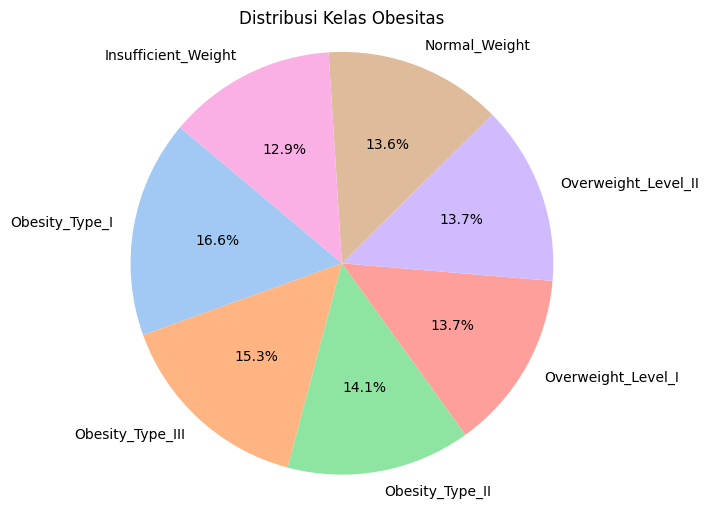

In [6]:
# Distribusi target (NObeyesdad)
plt.figure(figsize=(6,6))
df['NObeyesdad'].value_counts().plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title("Distribusi Kelas Obesitas")
plt.ylabel("")
plt.axis('equal')
plt.show()


In [10]:
# Ganti kolom sesuai dengan dataset Anda
numerik_kandidat = ['Age', 'Height', 'Weight']  # tambahkan kolom lain jika ada

for col in numerik_kandidat:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah ke float, NaN jika gagal

# Cek ulang tipe datanya
print(df[numerik_kandidat].dtypes)


Age       float64
Height    float64
Weight    float64
dtype: object


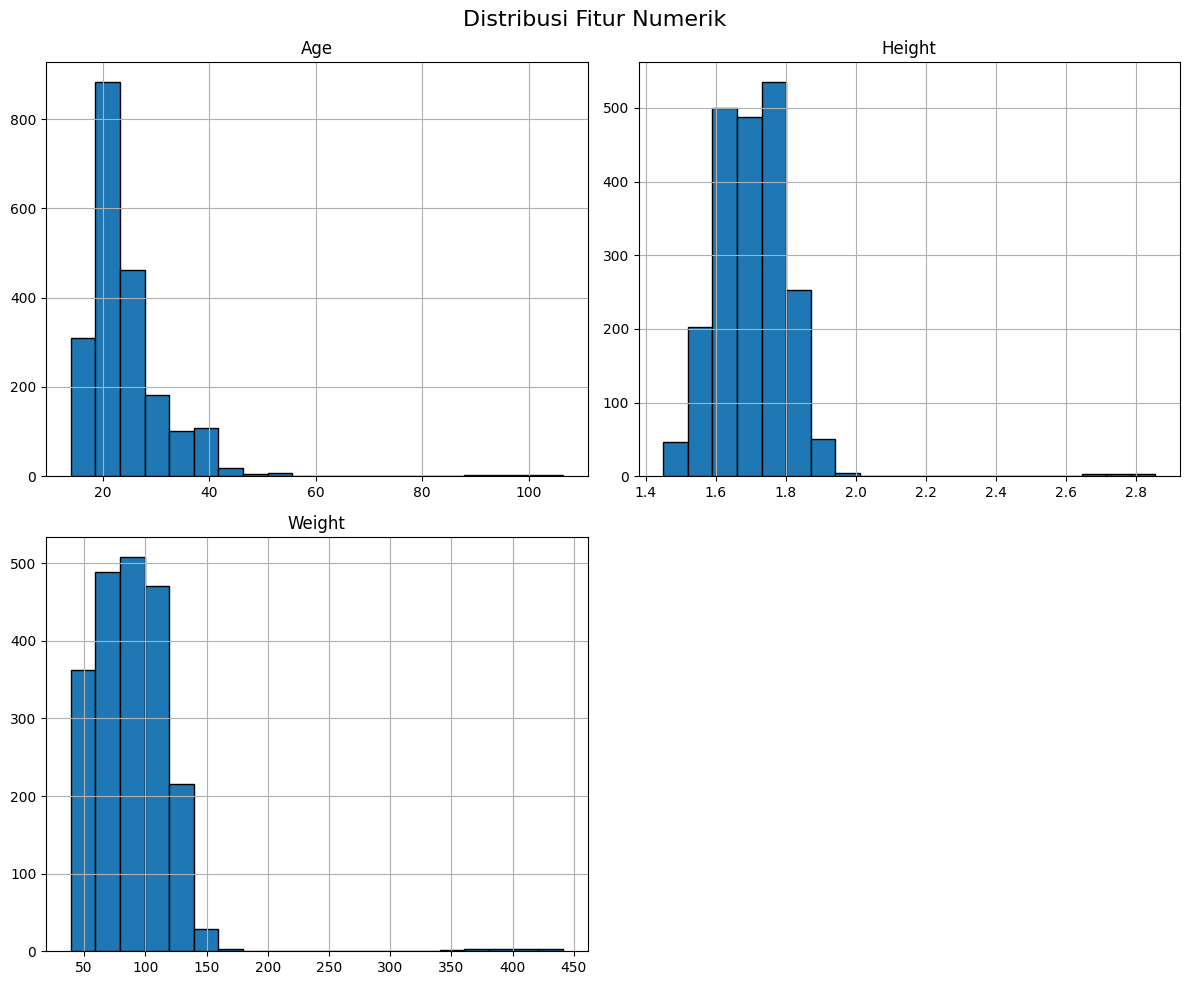

In [11]:
# Histograms untuk semua kolom numerik
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribusi Fitur Numerik", fontsize=16)
plt.tight_layout()
plt.show()


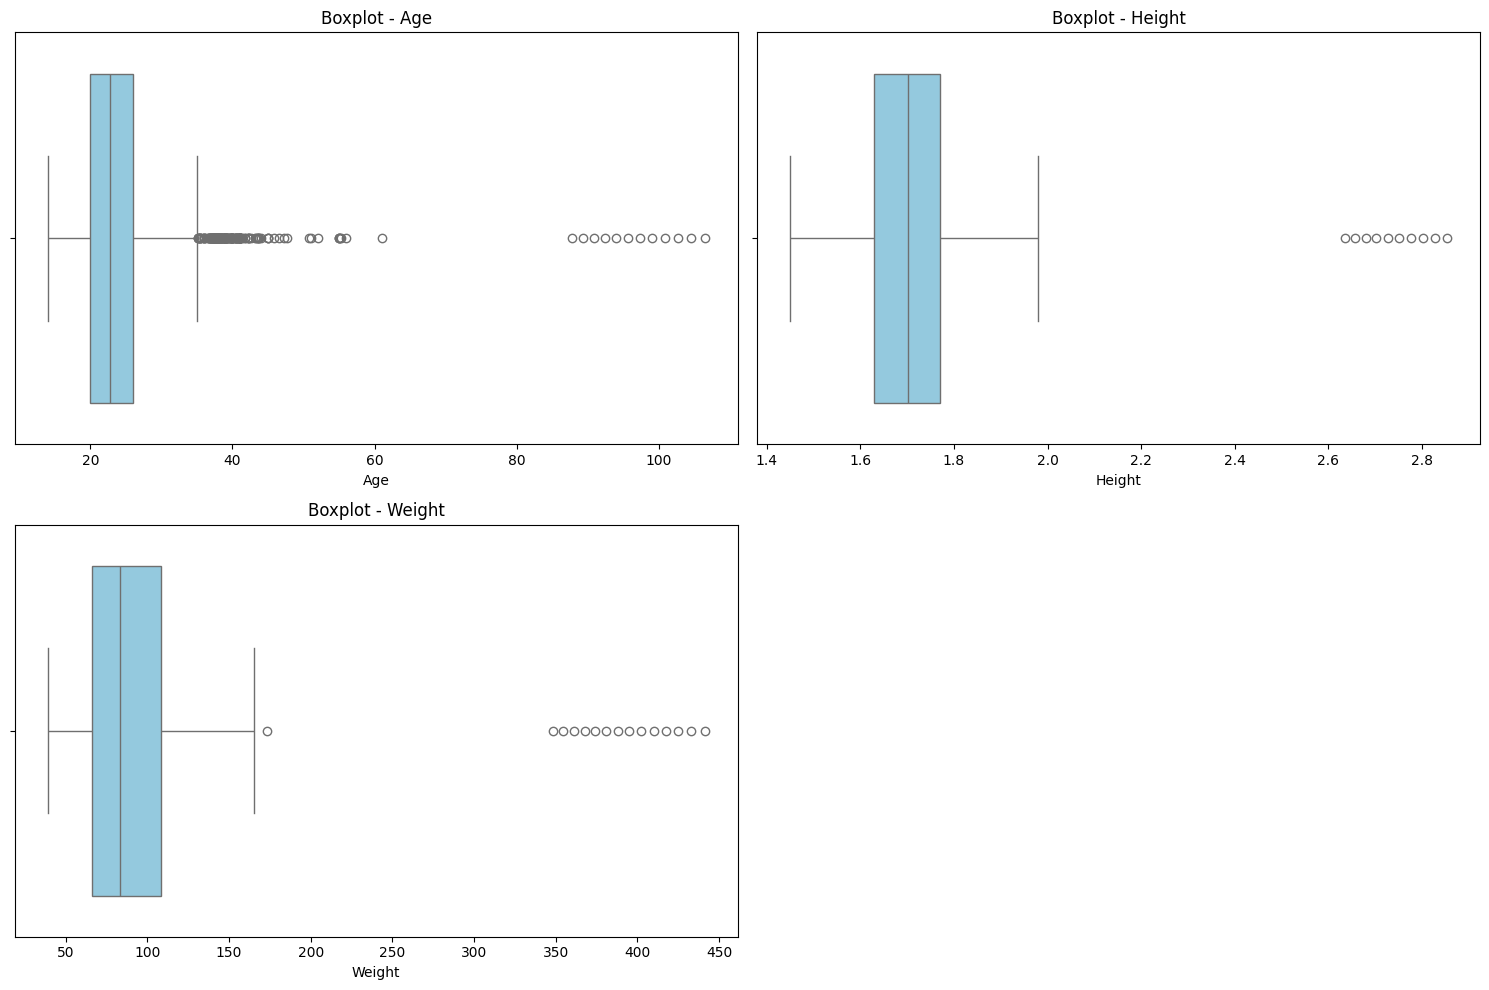

In [12]:
# Boxplot untuk deteksi outlier kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, len(numeric_cols)//2 + 1, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot - {col}")

plt.tight_layout()
plt.show()


<ipython-input-13-64a3a87fdcd7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
<ipython-input-13-64a3a87fdcd7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
<ipython-input-13-64a3a87fdcd7>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
<ipython-input-13-64a3a87fdcd7>:8: FutureWarning:

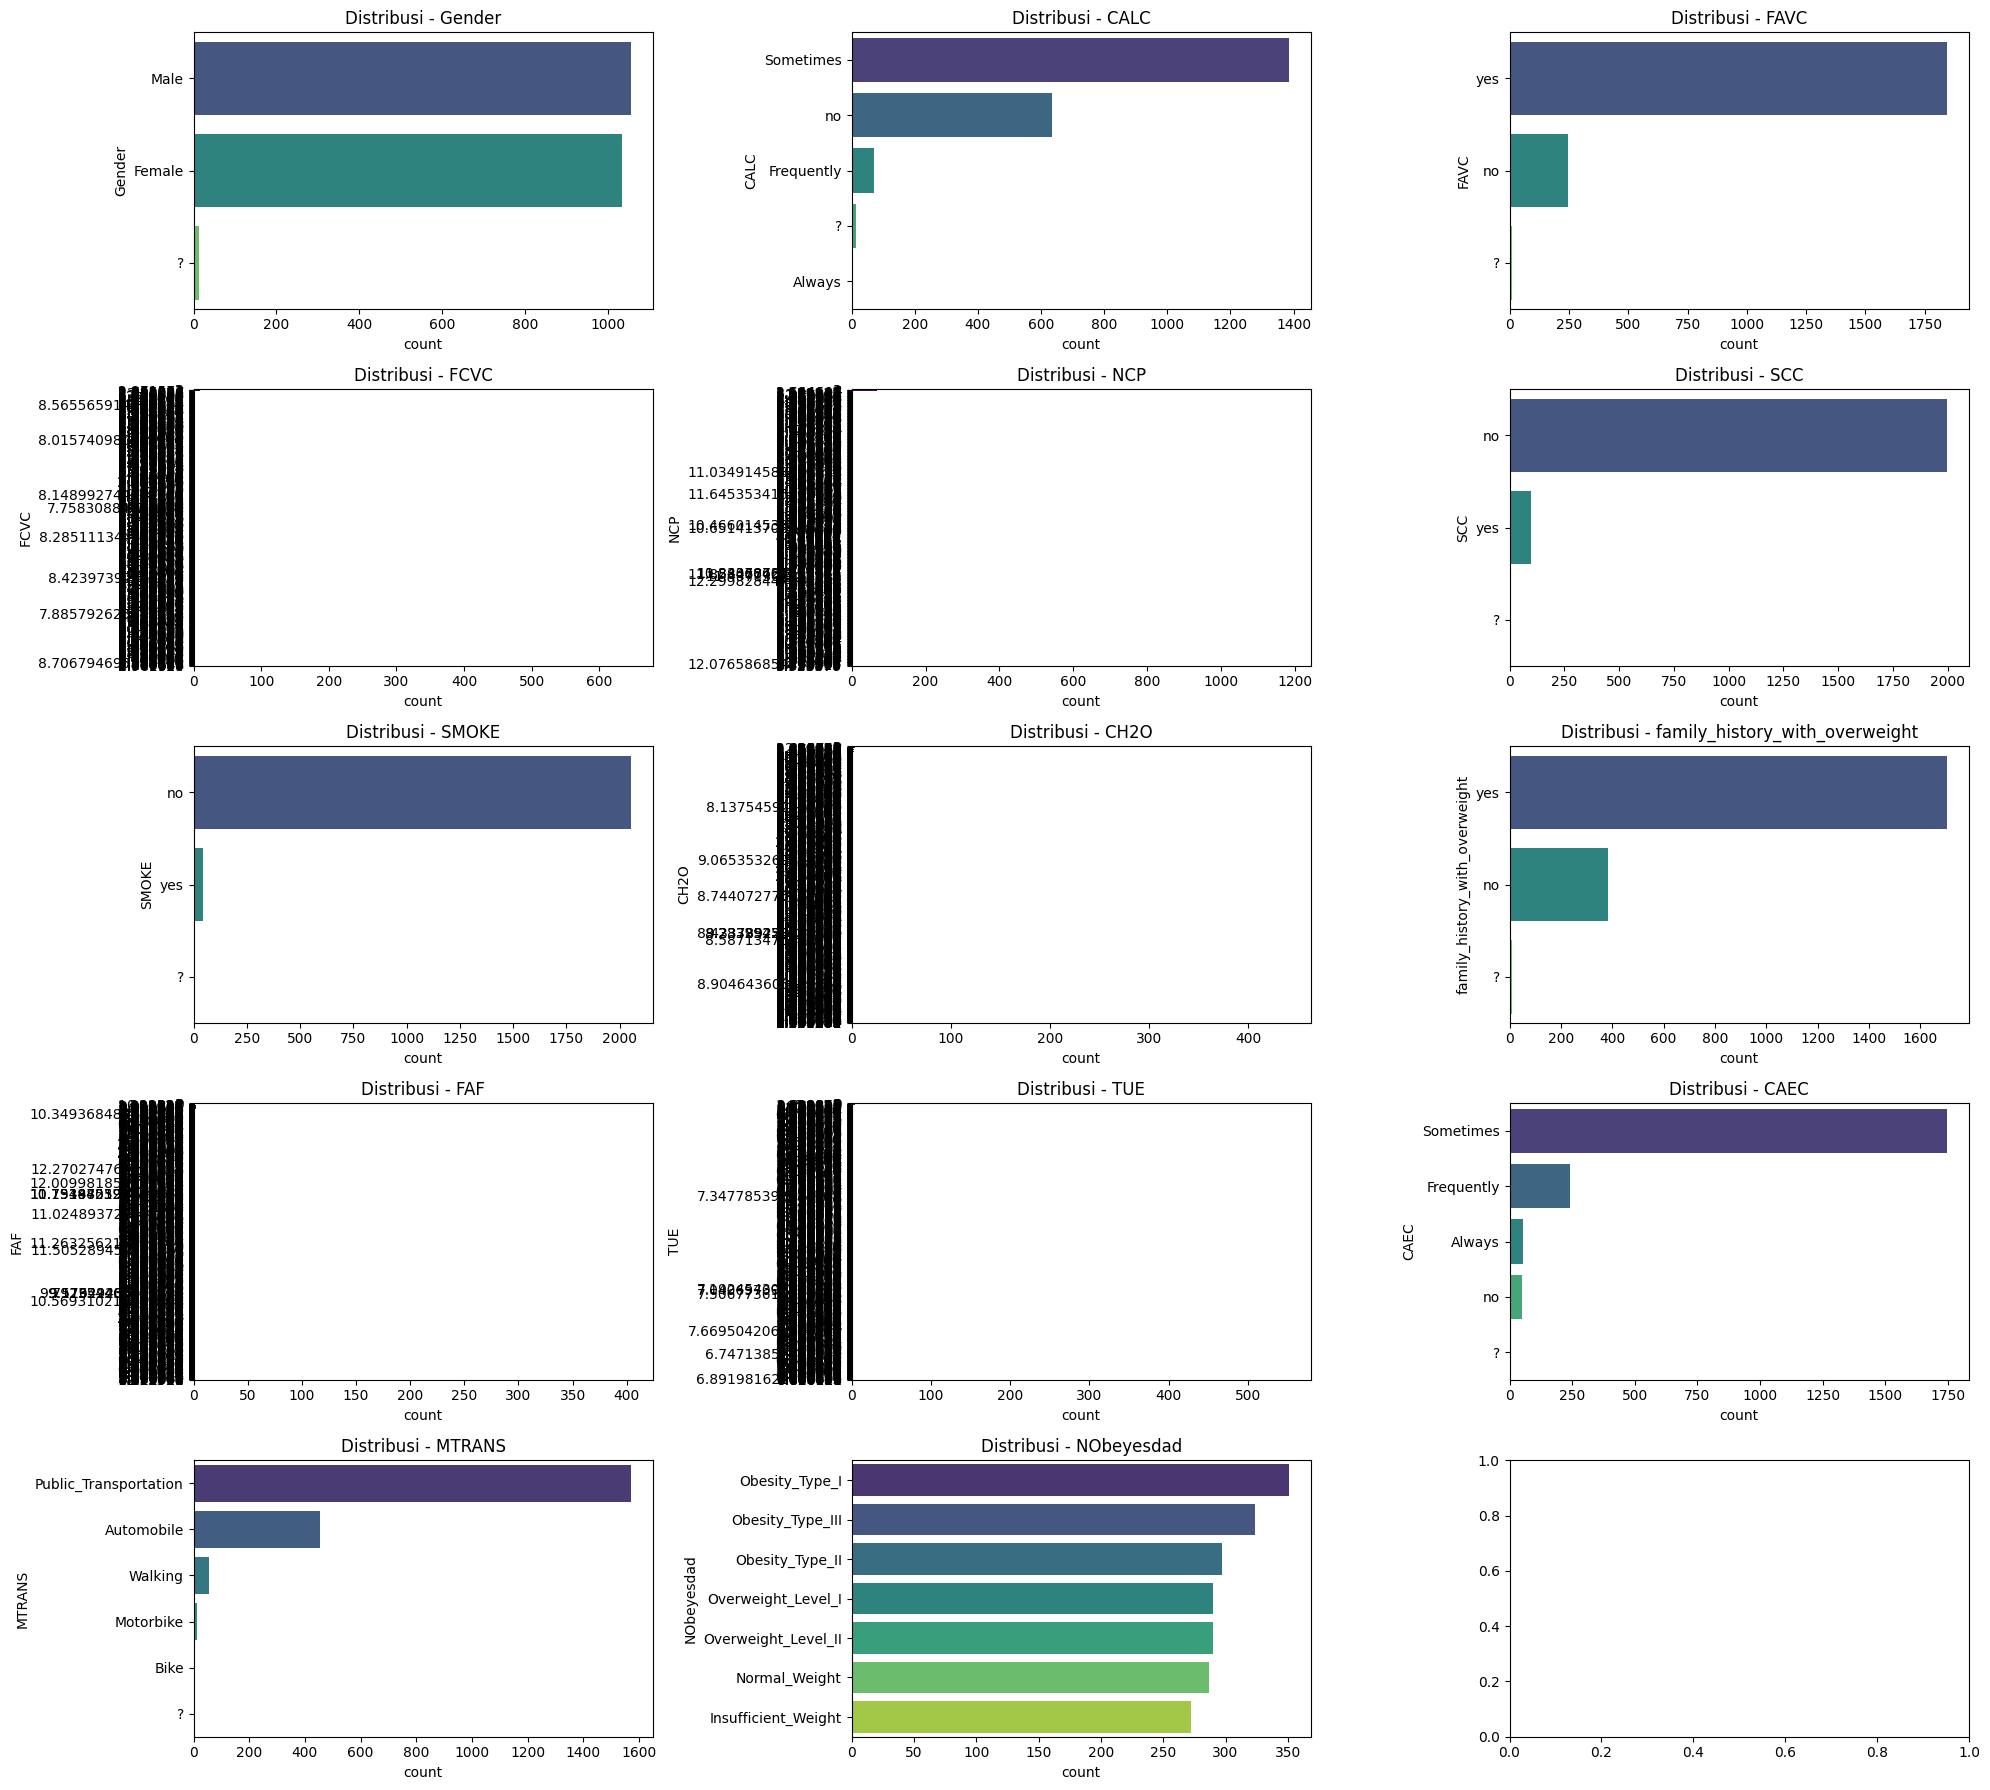

In [13]:
# Visualisasi distribusi data kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()

fig, axes = plt.subplots(nrows=(len(categorical_cols) // 3) + 1, ncols=3, figsize=(20, 18))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i], palette="viridis")
    axes[i].set_title(f"Distribusi - {col}")

plt.tight_layout()
plt.show()
